Dataset contains 9551 rows and 21 columns.

Missing Values in Each Column:
Cuisines    9
dtype: int64

✅ Missing values handled. Updated dataset:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Column Data Types Before Conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
L

/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_7227/1434065455.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Aggregate rating"], palette="viridis")


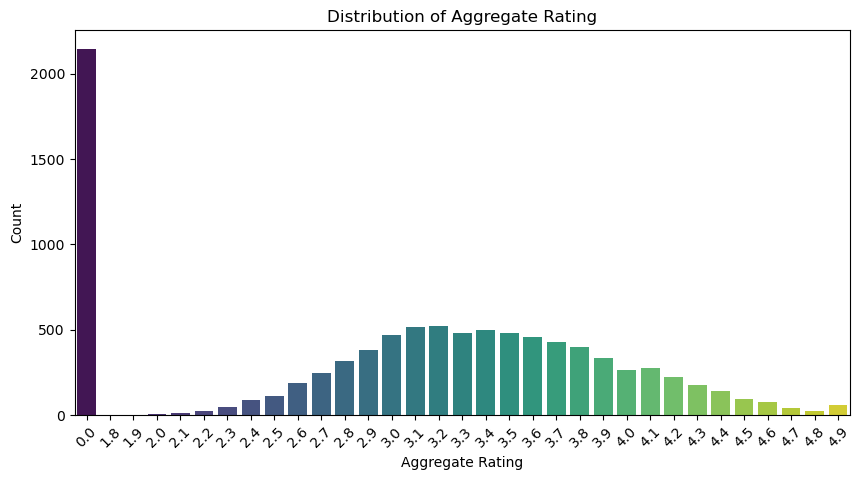


Class Distribution in 'Aggregate rating':
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

🍽️ Top 10 Cuisines with Most Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

🏙️ Top 10 Cities with Most Restaurants:
City
New Delhi     

/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_7227/1434065455.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="coolwarm")


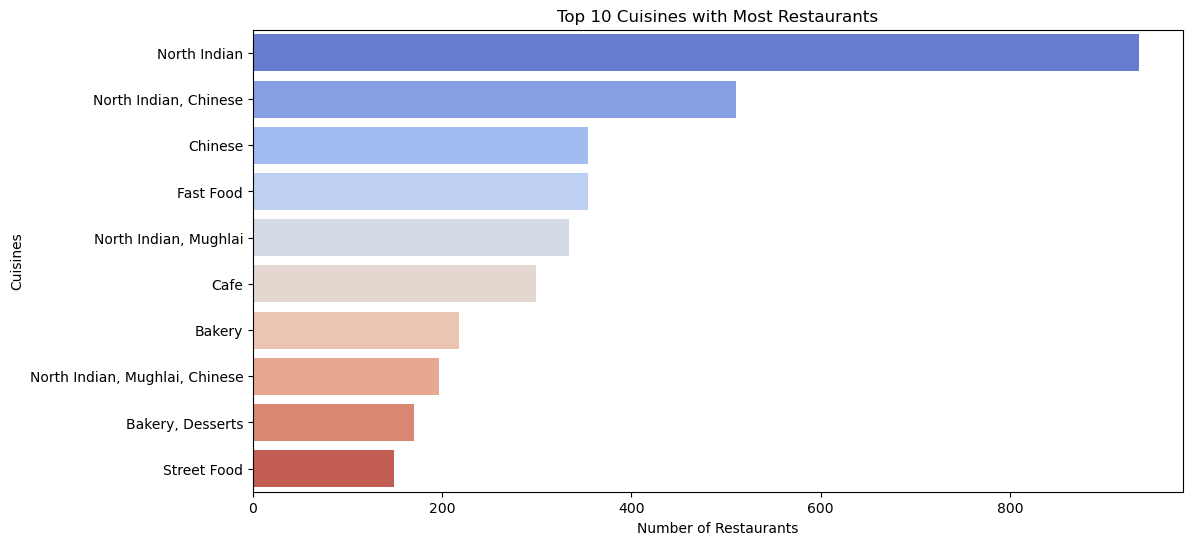

/var/folders/23/kn8zp7w51vl9fvnkkg7gbdc80000gn/T/ipykernel_7227/1434065455.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


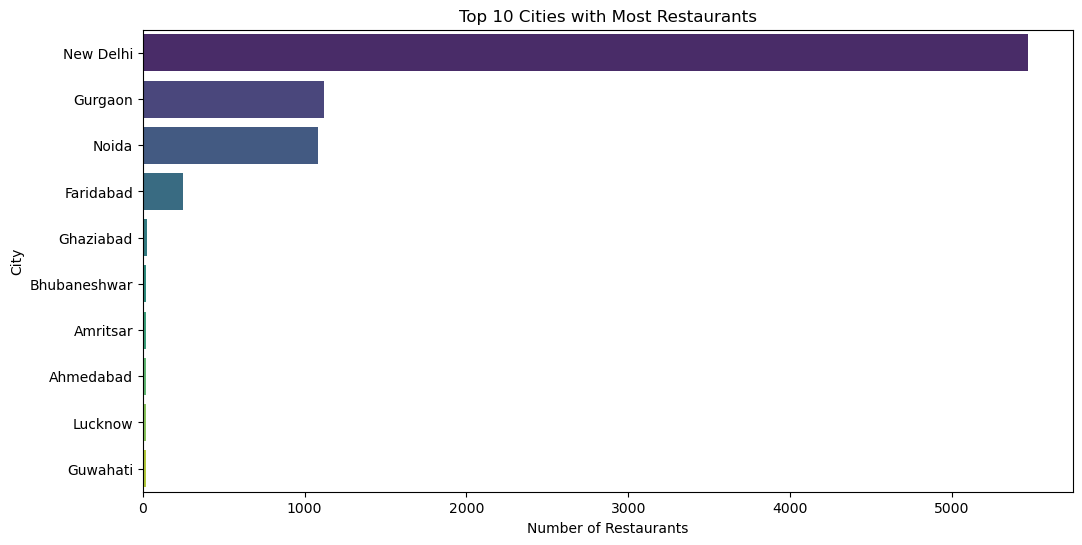


🗺️ Interactive restaurant map saved as 'restaurants_map.html'

🔥 Heatmap of restaurant locations saved as 'restaurants_heatmap.html'


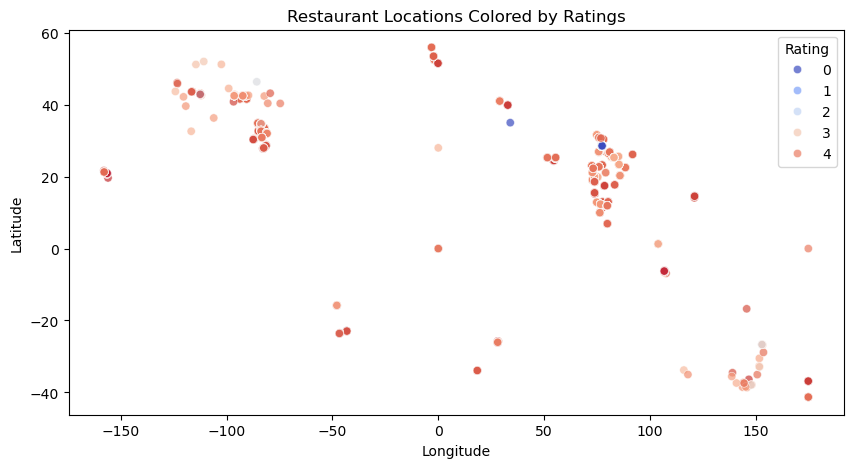


🗺️ Interactive restaurant map saved as 'restaurants_map.html'

🚀 Cleaned dataset saved as 'cleaned_dataset.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = "Dataset .csv"  # Update if needed
df = pd.read_csv(file_path)

# Identify the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Check for missing values and print them
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Handle missing values (Fill missing Cuisines with 'Unknown')
df.fillna({'Cuisines': 'Unknown'}, inplace=True)

print("\n✅ Missing values handled. Updated dataset:")
print(df.isnull().sum())  # Check again after handling

# Print Data Types
print("\nColumn Data Types Before Conversion:")
print(df.dtypes)

# Map "Country Code" to actual country names
country_mapping = {
    1: "India", 14: "Australia", 30: "Brazil", 37: "Canada", 94: "Indonesia",
    148: "New Zealand", 162: "Philippines", 166: "Qatar", 184: "Singapore", 
    189: "South Africa", 191: "Sri Lanka", 208: "Turkey", 214: "UAE", 215: "UK", 216: "USA"
}
df["Country"] = df["Country Code"].map(country_mapping)

# Calculate Basic Statistical Measures
print("\n📊 Basic Statistical Measures for Numerical Columns:")
print(df.describe())

# Analyze the Distribution of the Target Variable ('Aggregate rating')
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Aggregate rating"], palette="viridis")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Distribution of Aggregate Rating")
plt.xticks(rotation=45)
plt.show()

# Identify class imbalance
print("\nClass Distribution in 'Aggregate rating':")
print(df["Aggregate rating"].value_counts())

# Identify Top Cuisines and Cities with Most Restaurants
top_cuisines = df["Cuisines"].value_counts().head(10)
top_cities = df["City"].value_counts().head(10)

print("\n🍽️ Top 10 Cuisines with Most Restaurants:")
print(top_cuisines)

print("\n🏙️ Top 10 Cities with Most Restaurants:")
print(top_cities)

# Visualizing Top 10 Cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="coolwarm")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.title("Top 10 Cuisines with Most Restaurants")
plt.show()

# Visualizing Top 10 Cities with Most Restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities with Most Restaurants")
plt.show()

latitude_mean = df["Latitude"].mean()
longitude_mean = df["Longitude"].mean()

# Create a folium map
restaurant_map = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=5)

# Add restaurant locations as markers
for i, row in df.iterrows():
    if not pd.isnull(row["Latitude"]) and not pd.isnull(row["Longitude"]):
        folium.Marker(
            [row["Latitude"], row["Longitude"]],
            popup=row["Restaurant Name"]
        ).add_to(restaurant_map)

# Save the map
restaurant_map.save("restaurants_map.html")
print("\n🗺️ Interactive restaurant map saved as 'restaurants_map.html'")

# Create a Heatmap of Restaurant Locations
heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()

heatmap = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=5)
HeatMap(heat_data).add_to(heatmap)

# Save heatmap
heatmap.save("restaurants_heatmap.html")
print("\n🔥 Heatmap of restaurant locations saved as 'restaurants_heatmap.html'")

# Determine Correlation Between Location and Rating
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Longitude"], y=df["Latitude"], hue=df["Aggregate rating"], palette="coolwarm", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations Colored by Ratings")
plt.legend(title="Rating")
plt.show()

# Save the map
restaurant_map.save("restaurants_map.html")
print("\n🗺️ Interactive restaurant map saved as 'restaurants_map.html'")


# Save the cleaned dataset (optional)
df.to_csv("cleaned_dataset.csv", index=False)
print("\n🚀 Cleaned dataset saved as 'cleaned_dataset.csv'")